Reference:
1. official documentation  
https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html#sphx-glr-auto-examples-linear-model-plot-sparse-logistic-regression-mnist-py  
and  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  
2. blog  
https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

### Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np 
from sklearn.utils import check_random_state

In [2]:
from sklearn.datasets import fetch_openml
# fetch_openml is new latest sevetral version of sklearn, for version 0.19.0 or older please use fetch_mldata
# optimization algorithm saga is available only to version 0.23.0 or higher
X, y = fetch_openml('mnist_784', version=1, return_X_y=True,as_frame=0)

In [3]:
# These are the images
# There are 70,000 images (28 by 28 images for a dimensionality of 784)
print(X.shape)
# These are the labels
print(y.shape)

(70000, 784)
(70000,)


### Split dataset into training dataset and testing dataset

In [4]:
# random shuffle the data
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

In [5]:
# split the 70k images into 60k training images and 10k testing images
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(X, y, test_size=1/7.0, random_state=0)

### Showing the Images and Labels 

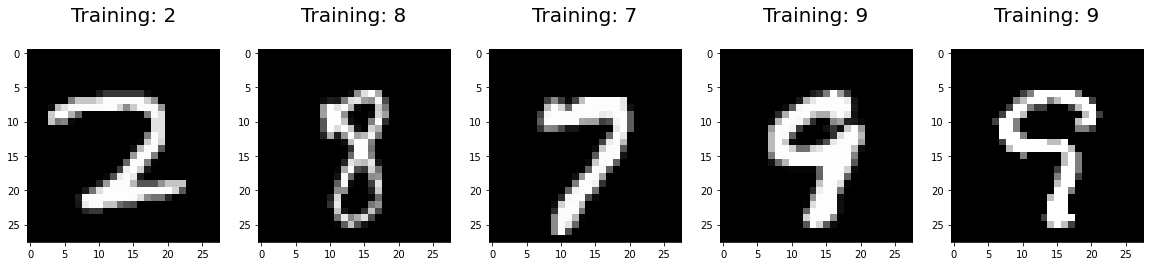

In [6]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: {}\n'.format(label), fontsize = 20)

### Fit the Logisitic Model with specified optimization methods

In [7]:
# import model
from sklearn.linear_model import LogisticRegression

In [8]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow, may use sag, saga, lgfbs, 
logisticRegr = LogisticRegression(solver = 'saga')

In [9]:
# train model on training dataset
logisticRegr.fit(train_img, train_lbl)

C:\Users\tbsvb\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(solver='saga')

In [10]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1)), test_lbl[0]

(array(['8'], dtype=object), '8')

In [11]:
predictions = logisticRegr.predict(test_img)

### Measuring Model Performance

In [12]:
# Use score method to get accuracy of model
trainscore = logisticRegr.score(train_img,train_lbl)
testscore = logisticRegr.score(test_img, test_lbl)
print('The training error is ',1-trainscore,' and the Testing error is',1-testscore)

The training error is  0.06101666666666672  and the Testing error is 0.07669999999999999


### Display misclassified images with predicted labels

In [13]:
# collect misclassified images
mis_vector = (test_lbl == predictions)
misclassifiedIndexes = np.where(mis_vector == 0)[0]

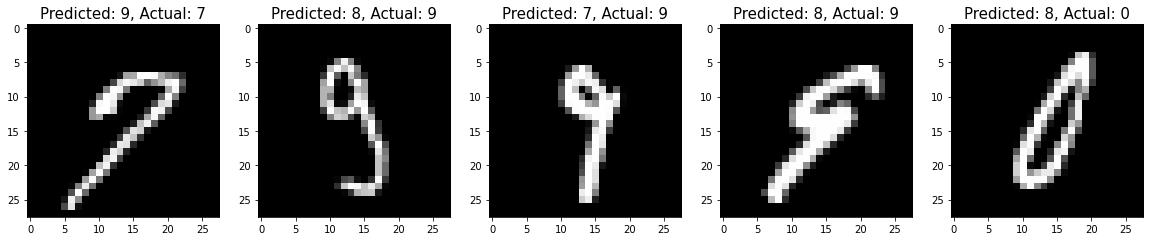

In [14]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

In [15]:
print('The total # of misclassified images is {}'.format(len(misclassifiedIndexes)))

The total # of misclassified images is 767
